# 그래프 설정

In [20]:
n = 4
edge = [
    (0, 1, 0),
    (0, 2, 0),
    #(0, 3, 0),
    (1, 2, 0),
    (1, 3, 0)
]

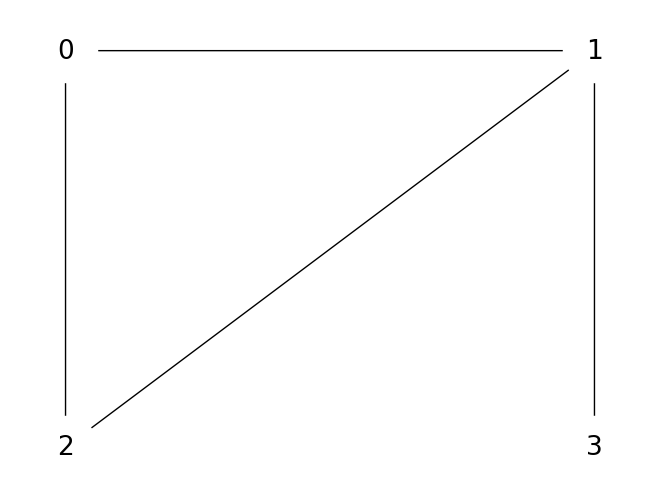

In [21]:
import matplotlib.pyplot as plt
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph

pos = {
    0: (0, 1),
    1: (1, 1),
    2: (0, 0),
    3: (1, 0)
}

graph = rx.PyGraph()
graph.add_nodes_from(range(0, n))
graph.add_edges_from(edge)
draw_graph(graph, with_labels=True, pos=pos, node_size=2000, font_size=19, node_color="white")



# 이론적 배경

#### $ \rm Adjacency~matrix $
위 상황에서 인접행렬은 다음과 같다: 
$$
\begin{bmatrix} 
   0 & 1 & 1 & 1 \\
   1 & 0 & 1 & 1 \\
   0 & 1 & 0 & 0 \\
   1 & 1 & 0 & 0 \\
\end{bmatrix}  
$$ 


#### $ \rm Hemiltonian $

$ |0111 \rangle \rm{인~경우의 ~weight}$:

$$
\frac{1}{2}
\left( 
\begin{bmatrix} 
   0 & 1 & 1 & 1
\end{bmatrix}  
\begin{bmatrix} 
   0 & 1 & 1 & 1 \\
   1 & 0 & 1 & 1 \\
   1 & 1 & 0 & 0 \\
   1 & 1 & 0 & 0 \\
\end{bmatrix} 
\begin{bmatrix} 
    0 \\
    1 \\
    1 \\
    1 \\
\end{bmatrix} 
\right) = 2
$$

$ \rm complement~graph~of~G의~Adjacency~mat을~이용 \Rightarrow clique일~수록~E~low $

In [28]:
import numpy as np

In [29]:
H = rx.adjacency_matrix(graph)
H = (1 - H) - np.eye(H.shape[0]) #Complement graph
H

array([[0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 1., 0.]])

In [30]:
H = (n + n) * H - np.eye(H.shape[0])
H

array([[-1.,  0.,  0.,  8.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0., -1.,  8.],
       [ 8.,  0.,  8., -1.]])

따단!

In [31]:
from scipy.linalg import eig, eigvals

In [32]:
eigvals(H)

array([-12.3137085+0.j,  -1.       +0.j,  10.3137085+0.j,  -1.       +0.j])

<Axes: >

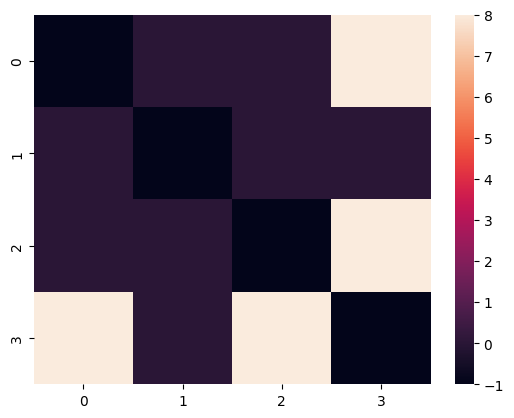

In [33]:
import seaborn as sns

sns.heatmap(H)